In [1]:
import pandas as pd
import numpy as np
import glob
from scipy.io import savemat, loadmat
import matplotlib.pyplot as plt

In [2]:
#Data paths
historical_path="/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/FloridaCurrent/yearfiles/historical/*.dat"
noaa_path="/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/FloridaCurrent/yearfiles/noaa/*.dat"

In [3]:
#Create an empty list to store the data
fct=[]

#Historical files, keeping NaN
for file in glob.glob(historical_path):
    fc=pd.read_csv(file,delim_whitespace=True,comment='%',header=None, 
                     names=["Year","Month","Day","Transport"],na_values='NaN')
    fct.append(fc)

#NOAA files
for file in glob.glob(noaa_path):
    fc= pd.read_csv(file,delim_whitespace=True,comment='%',header=None, 
                     names=["Year","Month","Day","Transport","Flag"],na_values='NaN')
    fct.append(fc)

# Concatenate all DataFrames into a single DataFrame
combined_fc=pd.concat(fct)

#Sort the combined data by Year, Month, and Day (as initial data)
combined_fc=combined_fc.sort_values(by=["Year","Month","Day"]).reset_index(drop=True)

In [4]:
#Save file in .csv format
output_path1="/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/FloridaCurrent/Florida_Current_Transport_1982_to_Present.csv"
combined_fc.to_csv(output_path1,index=False,na_rep='NaN')

In [5]:
#Save file in .mat format

#Se tiene que convertir DataFrame to a dictionary format for saving as .mat
data_dict = {
    'Year':combined_fc['Year'].values,
    'Month':combined_fc['Month'].values,
    'Day':combined_fc['Day'].values,
    'Transport':combined_fc['Transport'].values,
    'Flag':combined_fc['Flag'].values}

#output_path2="/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/FloridaCurrent/Florida_Current_Transport_1982_to_Present.mat"
#savemat(output_path2,data_dict)

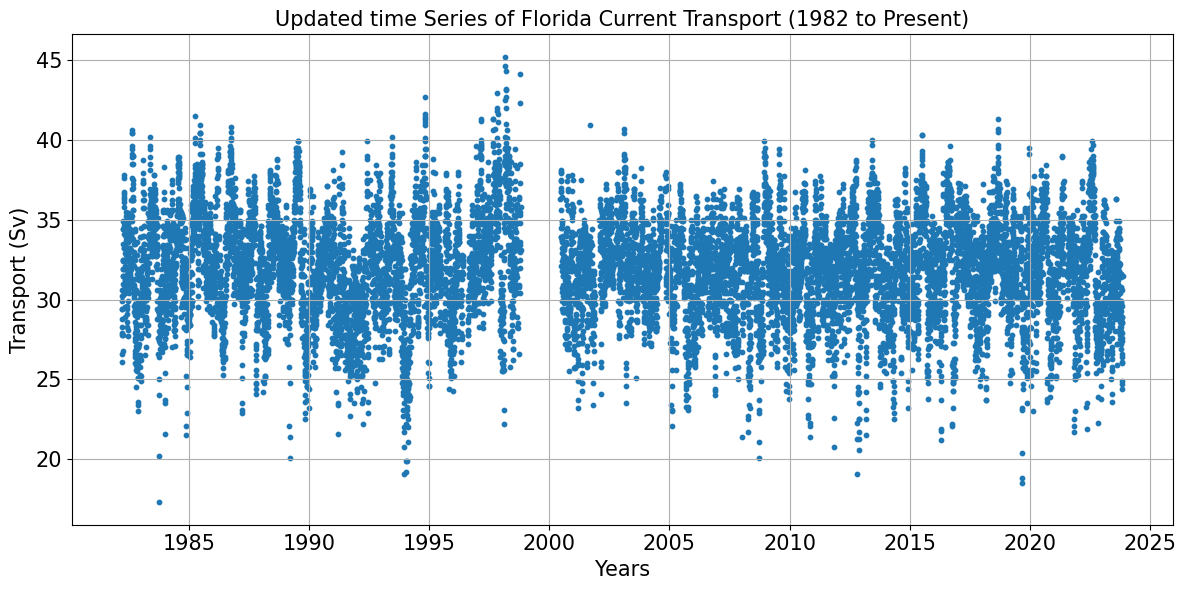

In [15]:
mat_file="/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/FloridaCurrent/Florida_Current_Transport_1982_to_Present.mat"
mat_data=loadmat(mat_file)

# Extract the data from the .mat file
years=mat_data['Year'].flatten()
months=mat_data['Month'].flatten()
days=mat_data['Day'].flatten()
transport=mat_data['Transport'].flatten()
flag=mat_data['Flag'].flatten()

# Create a DataFrame
df=pd.DataFrame({'Date':pd.to_datetime({'year':years,'month':months,'day':days}),'Transport':transport,'Flag':flag})

# Remove rows with NaN in Transport for plotting
df=df.dropna(subset=['Transport'])

# Plot 
plt.figure(figsize=(12,6))
plt.scatter(df['Date'],df['Transport'],color='C0',s=10)  # s=markers size
plt.xlabel('Years',fontsize=15)
plt.ylabel('Transport (Sv)',fontsize=15)
plt.title('Updated time Series of Florida Current Transport (1982 to Present)',fontsize=15)
plt.grid(True)
plt.tick_params(axis='both',which='major',labelsize=15)
plt.tight_layout()
plt.show()